In [66]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [67]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [68]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

Using: cuda


In [69]:
weight,bias = 0.7,0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight*X + bias
len(X),len(y)
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [70]:
train_split = int(len(X)*0.8)
X_train,y_train,X_test,y_test = X[:train_split],y[:train_split],X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [71]:
def plot_pred(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,preds=None):
  plt.scatter(X_train,y_train,c='b',s=4,label='Train')
  plt.scatter(X_test,y_test,c='g',s=4,label='Test')
  if preds is not None:
    plt.scatter(X_test,preds,c='r',s=4,label='Predictions')
  plt.legend()


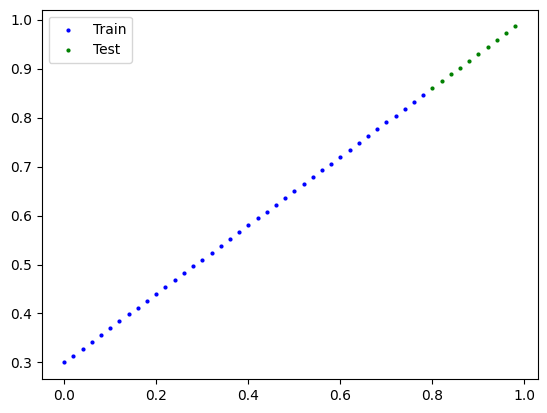

In [72]:
plot_pred(preds=None)

In [73]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x):
    return self.linear_layer(x)

In [74]:
torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [75]:
next(model.parameters()).device

device(type='cpu')

In [76]:
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [77]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [78]:
torch.manual_seed(42)
epochs = 1000
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  train_loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds,y_test)

  if epoch % 100 == 0:
    print(f"Epoch:{epoch}| Train loss:{train_loss}|Test loss: {test_loss}")

Epoch:0| Train loss:0.5551779866218567|Test loss: 0.5739762187004089
Epoch:100| Train loss:0.006215683650225401|Test loss: 0.014086711220443249
Epoch:200| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:300| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:400| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:500| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:600| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:700| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:800| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882
Epoch:900| Train loss:0.0012645035749301314|Test loss: 0.013801801018416882


In [79]:
from pprint import pprint
print("The model learned following values for weights and bias:")
pprint(model.state_dict())
print(f"weights : {weight} and bias: {bias}")

The model learned following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])
weights : 0.7 and bias: 0.3


In [80]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')